In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline

In [2]:
# Функция отображения изображения

def imshow(img, cmap = "gray"):
    plt.imshow(img, cmap)
    plt.show()     

In [3]:
# Функция, которая применяет афинные преобразования к изображению

def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1])
    return result

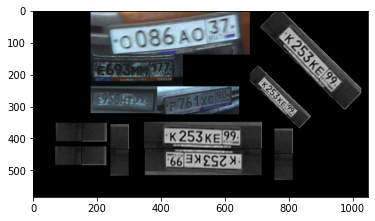

In [4]:
img = cv2.imread("plate_number.png")
imshow(img)

In [5]:
# Каскад Хаара для российских автомобильных номеров

plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [6]:
def makeRotations(prepared_img, res_image, angle):
    global cnt
    prepared_img = rotateImage(prepared_img, angle)
    res_image = rotateImage(res_image, angle)
    gray_rotated = cv2.cvtColor(prepared_img, cv2.COLOR_BGR2GRAY)
    license_plates = plate_cascade.detectMultiScale(gray_rotated)

    for (x, y, w, h) in license_plates:
        if (w > 2 * h) and (w * h > 6000):
            start_point = (x + int(w * 0.1), y + int(h * 0.15))
            end_point = (start_point[0] + int(w * 0.8), start_point[1] + int(h * 0.7))
            cv2.rectangle(res_image, start_point, end_point, (0,255,255), 5)
            cv2.rectangle(prepared_img, start_point, end_point, (0,255,255), cv2.FILLED)
            cnt += 1

    prepared_img = rotateImage(prepared_img, -angle)
    res_image = rotateImage(res_image, -angle)
    return prepared_img, res_image

In [9]:

prepared_img = img.copy()
prepared_img = imutils.rotate_bound(prepared_img, 45)
prepared_img = imutils.rotate_bound(prepared_img, -45)

res_image = prepared_img.copy()

cnt = 0
prepared_img, res_image = makeRotations(prepared_img, res_image, 0)
prepared_img, res_image = makeRotations(prepared_img, res_image, -10)
prepared_img, res_image = makeRotations(prepared_img, res_image, 45)


Обнаружено номеров:  7


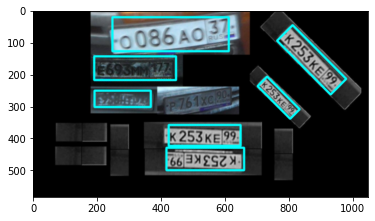

In [10]:
source_w, source_h = img.shape[1], img.shape[0]
res_w, res_h = prepared_img.shape[1], prepared_img.shape[0]

offset_x, offset_y = (res_w - source_w) // 2, (res_h - source_h) // 2
cropped_image = res_image[offset_y: source_h + offset_y, offset_x : source_w + offset_x]

print("Обнаружено номеров: ", cnt)
plt.imshow(cropped_image)
plt.show()